In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns 
from scipy.stats import norm
from scipy.stats import t

In [2]:
df_iris = pd.read_csv('..\StatistiskaMetoder\data\iris.csv')

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal_length   150 non-null    float64
 1    sepal_width   150 non-null    float64
 2    petal_length  150 non-null    float64
 3    petal_width   150 non-null    float64
 4    class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df_iris[' class'].unique() # we can see that there are 3 different types of Iris

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
# Now I will separate so that the 3 types have a separate table each.

df_setosa = df_iris[df_iris[' class'] == 'Iris-setosa'].reset_index(drop=True)
df_versicolor = df_iris[df_iris[' class'] == 'Iris-versicolor'].reset_index(drop=True)
df_virginica = df_iris[df_iris[' class'] == 'Iris-virginica'].reset_index(drop=True)

# we can tell that each data set has a total of 50 of the 3 different types of Iris flowers
# This is good as it is equal sample sets for each type


In [6]:
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [7]:
# I will now look at the different types of average (mean,median and mode) for sepal length of the  setosa Iris flower.

df_virginica['sepal_length'].describe()[["mean","50%"]]


mean    6.588
50%     6.500
Name: sepal_length, dtype: float64

In [8]:
# getting the mean and median of the length of stem(sepal) for each Iris type
setosa_sep_length_mean = df_setosa["sepal_length"].mean().round(2)
setosa_sep_length_median = df_setosa["sepal_length"].median().round(2)
setosa_sep_stan_dev = np.std(df_setosa["sepal_length"],ddof=1).round(2)
print(f"The Setosa Iris stem has a mean of {setosa_sep_length_mean}, median of {setosa_sep_length_median} and a Standard deviation of {setosa_sep_stan_dev}")

versicolor_sep_length_mean = df_versicolor["sepal_length"].mean().round(2)
versicolor_sep_length_median = df_versicolor["sepal_length"].median().round(2)
versicolor_sep_stan_dev = np.std(df_versicolor["sepal_length"],ddof=1).round(2) # ddof means that it is a sample standard deviation
print(f"The Versicolor Iris stem has a mean of {versicolor_sep_length_mean}, median of {versicolor_sep_length_median} and Standard deviation of {versicolor_sep_stan_dev}")

virginica_sep_length_mean = df_virginica["sepal_length"].mean().round(2)
virginica_sep_length_median = df_virginica["sepal_length"].median().round(2)
virginica_sep_stan_dev = np.std(df_virginica["sepal_length"],ddof=1).round(2)
print(f"The Virginica Iris stem has a mean {virginica_sep_length_mean}, median {virginica_sep_length_median} and a Standard deviation of {versicolor_sep_stan_dev}")


The Setosa Iris stem has a mean of 5.01, median of 5.0 and a Standard deviation of 0.35
The Versicolor Iris stem has a mean of 5.94, median of 5.9 and Standard deviation of 0.52
The Virginica Iris stem has a mean 6.59, median 6.5 and a Standard deviation of 0.52


In [9]:
# Also we can check to see how the normaldistribution mean and normal deviation and standard deviation

setosa_sep_norm = norm.mean(df_setosa["sepal_length"])
#setosa_sep_norm_dev =
#setosa_sep_norm_std_dev = 

print(f"{setosa_sep_norm}")

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


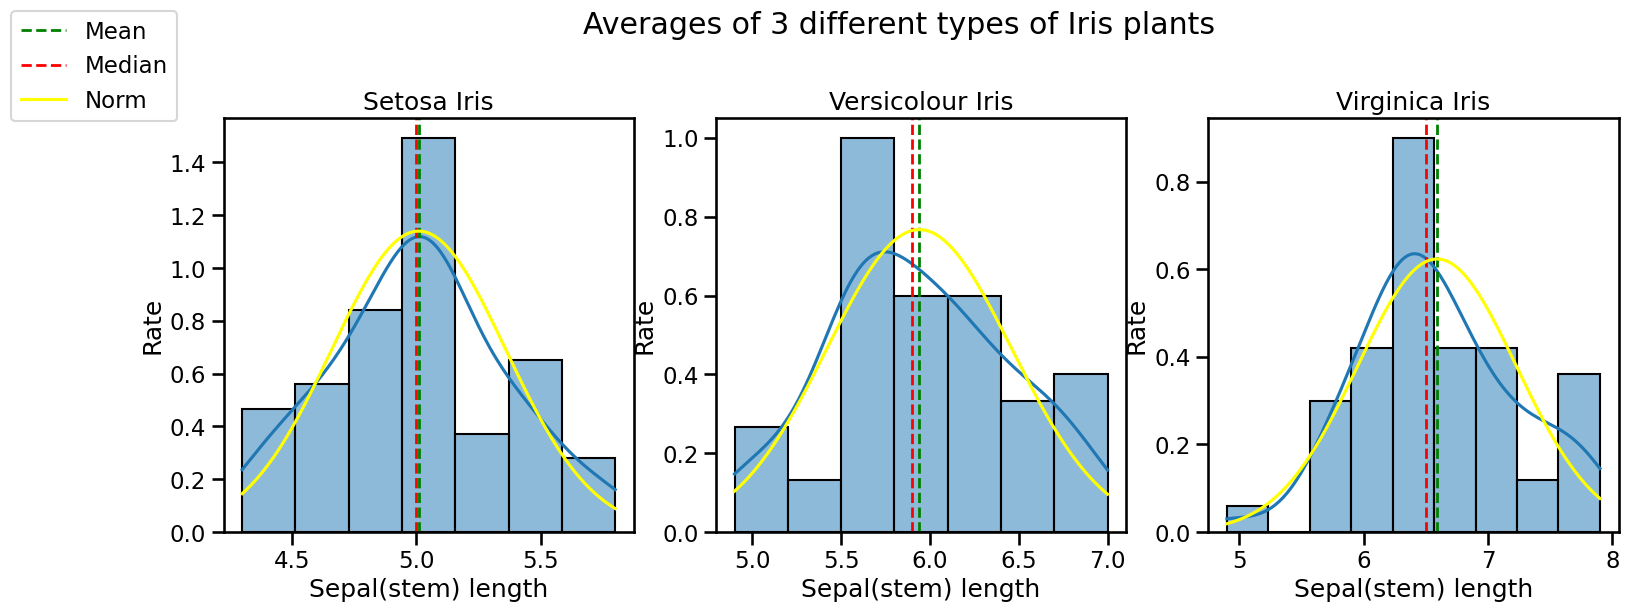

In [19]:
# plot on 3 different graphs median and mean of the stem length of each different varieties of Iris

fig, ax = plt.subplots(1,3, figsize= (18,6))

# setosa plot
sns.histplot(ax = ax[0], x = "sepal_length", data=df_setosa, stat="density", kde=True)
sns.set_context("talk")
fig.subplots_adjust(top=.8)
fig.suptitle('Averages of 3 different types of Iris plants')

ax[0].set(title="Setosa Iris", xlabel= "Sepal(stem) length", ylabel= "Rate")
ax[0].axvline(setosa_sep_length_mean, color="green", linestyle="--", linewidth=2, label="Mean")
ax[0].axvline(setosa_sep_length_median, color="red", linestyle="--", linewidth=2, label="Median")

setosa_x = np.linspace(4.3, 5.8, 1000)
setosa_y = norm.pdf(x= setosa_x , loc=setosa_sep_length_mean, scale=setosa_sep_stan_dev)
ax[0].plot(setosa_x,setosa_y, color="yellow", label="Norm")

# versicolor plot
sns.histplot(ax = ax[1], x= "sepal_length", data=df_versicolor,stat="density", kde=True)
ax[1].set(title="Versicolour Iris", xlabel="Sepal(stem) length", ylabel="Rate")
ax[1].axvline(versicolor_sep_length_mean, color="green", linestyle="--", linewidth=2)
ax[1].axvline(versicolor_sep_length_median, color="red", linestyle="--", linewidth=2)

versicolor_x = np.linspace(4.9, 7, 1000)
versicolor_y = norm.pdf(x= versicolor_x , loc=versicolor_sep_length_mean, scale=versicolor_sep_stan_dev)
ax[1].plot(versicolor_x,versicolor_y, color="yellow")

# virginica plot
sns.histplot(ax = ax[2], x= "sepal_length", data=df_virginica, stat="density",kde=True)
ax[2].set(title="Virginica Iris", xlabel="Sepal(stem) length", ylabel="Rate")
ax[2].axvline(virginica_sep_length_mean, color="green", linestyle="--", linewidth=2)
ax[2].axvline(virginica_sep_length_median, color="red", linestyle="--", linewidth=2)

virginica_x = np.linspace(4.9, 7.9, 1000)
virginica_y = norm.pdf(x= virginica_x , loc=virginica_sep_length_mean, scale=virginica_sep_stan_dev)
ax[2].plot(virginica_x,virginica_y, color="yellow")

fig.legend(loc="upper left")
plt.show()

In [11]:
# With this information of the different averages i will now check if how certain i am with that the normaldistribution can be a good
# estimate for the whole population of the Stem lengths of the different species of Iris plants

# Setosa confidence interval of 95%

alpha = 0.05 # This is the significance grade i want to study

setosa_data_total = len(df_setosa["sepal_length"]) # length of data set
setosa_sep_length_sem = scs.sem(df_setosa["sepal_length"]) # Counts standard error mean  

lower_setosa_sep_length, upper_setosa_sep_length = t.interval(confidence=1-alpha, df=setosa_data_total-1, loc=setosa_sep_length_mean, scale=setosa_sep_length_sem)

print(f"Confidence interval (\u03B1=0.05) for average sepal length of \"Setosa\" Iris: {round(lower_setosa_sep_length,1)} - {round(upper_setosa_sep_length,1)}")

# Versicolor confidence interval of 95%

versicolor_data_total = len(df_versicolor["sepal_length"]) # length of data set
versicolor_sep_length_sem = scs.sem(df_versicolor["sepal_length"]) # Counts standard error mean  

lower_versicolor_sep_length, upper_versicolor_sep_length = t.interval(confidence=1-alpha, df=versicolor_data_total-1, loc=versicolor_sep_length_mean, scale=versicolor_sep_length_sem)

print(f"Confidence interval (\u03B1=0.05) for average sepal length of \"Versicolor\" Iris: {round(lower_versicolor_sep_length,1)} - {round(upper_versicolor_sep_length,1)}")

# Virginica confidence interval of 95 %

virginica_data_total = len(df_virginica["sepal_length"]) # length of data set
virginica_sep_length_sem = scs.sem(df_virginica["sepal_length"]) # Counts standard error mean  

lower_virginica_sep_length, upper_virginica_sep_length = t.interval(confidence=1-alpha, df=virginica_data_total-1, loc=virginica_sep_length_mean, scale=virginica_sep_length_sem)

print(f"Confidence interval (\u03B1=0.05) for average sepal length of \"Virginica\" Iris: {round(lower_virginica_sep_length,1)} - {round(upper_virginica_sep_length,1)}") 

Confidence interval (α=0.05) for average sepal length of "Setosa" Iris: 4.9 - 5.1
Confidence interval (α=0.05) for average sepal length of "Versicolor" Iris: 5.8 - 6.1
Confidence interval (α=0.05) for average sepal length of "Virginica" Iris: 6.4 - 6.8


In [12]:
 #I will now look at some probabilities of different things within my sample data


